In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

plt.style.use("https://github.com/mlefkir/beauxgraphs/raw/main/beautifulgraphs_colblind.mplstyle")

In [40]:
def autocovariance(X):
    """Compute the autocovariance of a time series.

    Parameters
    ----------
    X : np.ndarray
        Time series.

    Returns
    -------
    acv : np.ndarray
        Autocovariance of the time series.
    """
    
    n = len(X)
    mu = np.mean(X)
    x_t = X - mu # centered time series
    acv = np.zeros(n)
    for lag in range(0,n):
        x_ttau = np.roll(x_t, -lag) - mu # centered time series shifted by lag
        acv[lag] = np.mean(x_t * x_ttau)
    return acv

def power_spectrum(X):
    """Compute the power spectrum of a time series.

    Parameters
    ----------
    X : np.ndarray
        Time series.

    Returns
    -------
    ps : np.ndarray
        Power spectrum of the time series.
    freqs : np.ndarray
        Frequencies corresponding to the power spectrum.
    """
    
    n = len(X)
    X_C = X - np.mean(X) # centered time series
    freqs = np.linspace(1/n, 1/2, n//2-1)
    ps = np.abs(fft(X_C))**2
    return ps[1:n//2],freqs

/var/folders/v1/wf6l8p9j24nb6h9_03lkd984000zqy/T/ipykernel_82564/129268299.py:10: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(t, autocovariance(X),'o-', linefmt=f"C{i}",basefmt='k-')


Variance of the time series: 1.08
Sum of spectral density: 1.09


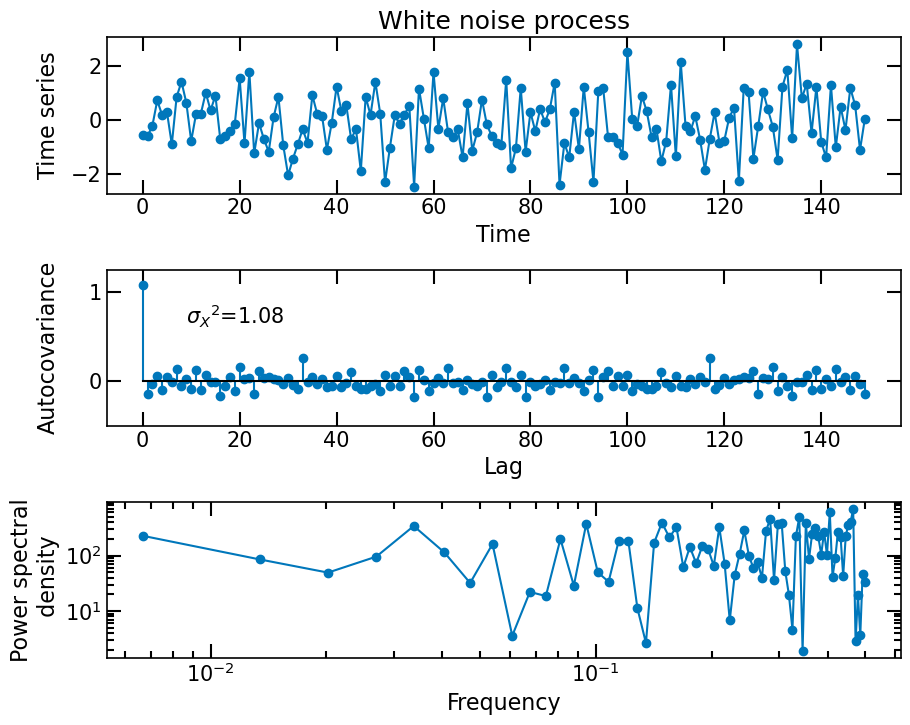

In [41]:
n = 150
t = np.arange(n)
# seed for reproducibility
key = np.random.default_rng(144)

fig , ax = plt.subplots(3,1,figsize=(9.5,7.5))
for i in range(1):
    X = key.normal(size=n)
    ax[0].plot(t, X,'o-', color=f"C{i}")
    ax[1].stem(t, autocovariance(X),'o-', linefmt=f"C{i}",basefmt='k-')
    P,f = power_spectrum(X)
    ax[2].loglog(f, P,marker='o', color=f"C{i}", label=f"Power spectrum {i}")

# ax[1].hlines(0, 0, n, linestyles='dashed', color='k')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Time series')
ax[0].set_title(r'White noise process')

ax[1].text(0.1, 0.65, r'${\sigma_X}^2 $='+f"{np.var(X):.2f}", transform=ax[1].transAxes)
ax[1].set_ylim(-0.5, 1.25)
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocovariance')

ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Power spectral\n density')
fig.align_ylabels(ax)
fig.tight_layout()
fig.savefig('white_noise.pdf', dpi=300)


print(f"Variance of the time series: {np.var(X):.2f}")
print(f"Sum of spectral density: {np.sum(P)*(f[1]-f[0])/n*2:.2f}")